# Parcel Delivery Prediction

### Problem Statement:

Amazon US facilitates Indian sellers to sell their products in the US marketplace through their seller-fulfilled channels using a program called Amazon Global Selling. An Amazon seller in India is selling his books at Amazon's US marketplace.

The default delivery date appears at the buyer's portal between 14-28 days since order is being fulfilled from outside US (India). The seller in India is using USPS as their deliverty service provider.

Usually, it takes at least 5 days to reach the parcel at the USPS center at New Jersey and then onwards 6th day, the buyer can see the tracking details of his parcel on the portal. Due to this blank spot of 5 days, the orders are being canceled from the buyers end as they are unable to track their parcel within initial 5 days of order placed. However maximum 10 days are taken to deliver the parcel in any part of the USA which is way sooner than the delivery threshold of 14-28 days of Amazon's US marketplace.

#### Problem Statement:
The Amazon seller in India is suffering high order-cancellation rate as orders are being canceled while they are in transit. This not only downgrades the account's health matrics but also increases the huge loss in terms of cost.

In order to reduce the order-cancellation rate, the seller needs a parcel delivery prediction model so that the expected delivery date can be shared with the buyer before initiating the dispatch process.

## Challenges and other objectives

- Extensive feature engineering is required as dataset has limited relevant features to develope the prediction model.
- Web scrapping is used to extract weather condition.
- Google Maps API is used to find out the Latitude and Longitude coordinates.
- Google Maps API is used to find out the travel distance and time required to deliver the parcel.
- The same webpage can be used for both Instance prediction and Batch file prediction.
- The model will evaluate the currently trained model with the previously trained model. If the currently trained model is better then saving the model and transformer objects for the future prediction.

## Features Details:

### Features in Parcel dataset file:
- order-id: Unqiue ID for each order
- product-name: Name of the product sold
- purchase-date: Date and Time of the order recived in the form of Datetime stamp
- quantity-purchased: Units of product sold
- currency: Currency used for transaction, USD for US marketplace
- ship-service-level: "Standard" for all orders
- buyer-name: Buyer's name (Truncated)
- ship-address-1: Buyer's address-1 (Truncated)
- ship-address-2: Buyer's address-2 (Truncated)
- ship-city: Buyer's city name 
- ship-state: Buyer's State name 
- ship-state-id: Buyer's State ID in two alphadigits
- postal-code: Buyer's 5 digit US postal code
- ship-country: Buyer's country name (US for all oders)
- ship-phone-number: Buyer's contact number (Truncated)
- temp: Temprature of buyer's potal code
- unit: Unit of temprature in °C of buyer's potal code
- description: 8 unique strings about weather condition of buyer's potal code
- prepcipitation: float number between 0-1.0
- humidity: float number between 0.05-1.0
- wind: Speed in km/h
- weight: Weights of parcel in KG
- service: Delivery serivce provider name (USPS) for all orders
- tracking-number: Unqiue 27 digits alhanumeric ID for each order
- days-taken: Output feature (Number of days taken to deliver the parcel)

### Features in Coordinates dataset file:
- ship-city: Buyer's city name 
- ship-state: Buyer's State name 
- ship-state-id: Buyer's State ID in two alphadigits
- region: 5 unique US region name in string
- postal-code: Buyer's 5 digit US postal code
- latitude: Latitude coordinate of the buyer's postal code
- longitude: Longitude coordinate of the buyer's postal code
- distance: Travel distance between New Jersey's USPS center and the buyer's postal code in km
- duration: Time required to travel distance between New Jersey's USPS center and the buyer's postal code in hours



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
#import haversine as hs

import googlemaps

api_key = 'XXXXXXXX'

In [2]:
data = pd.read_excel(r'C:\Users\Ricky\Downloads\Parcel_dataset_1.xlsx')
data.head()

,order-id,product-name,purchase-date,quantity-purchased,currency,ship-service-level,buyer-name,ship-address-1,ship-address-2,ship-city,ship-state,ship-state-id,postal-code,ship-country,ship-phone-number,temp,unit,description,prepcipitation,humidity,wind,weight,service,tracking-number,days-taken
0,118-2867503-4679330,Product8,2022-10-01T01:06:20-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Lone Oak,Texas,TX,75453,US,+1 XXX-XXX-XXXX ext. XXXXX,17,°C,Windy,0.10,0.89,33km/h,0.20,USPS,USPS-9352069905505441724057,9
1,116-6101706-9518448,Product1,2022-10-01T01:06:40-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Yorktown,Arkansas,AR,71678,US,+1 XXX-XXX-XXXX ext. XXXXX,15,°C,Windy,0.02,0.80,29km/h,0.91,USPS,USPS-9352069905509031628247,8
2,118-1868574-4706173,Product7,2022-10-01T01:09:36-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Wickliffe,Ohio,OH,44092,US,+1 XXX-XXX-XXXX ext. XXXXX,13,°C,Clear,0.07,0.58,31km/h,1.47,USPS,USPS-9352069905501865478936,8
3,114-9587904-4824228,Product5,2022-10-01T01:17:35-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Widener,Arkansas,AR,72394,US,+1 XXX-XXX-XXXX ext. XXXXX,19,°C,Smoke,0.05,0.34,13km/h,0.55,USPS,USPS-9352069905507542341949,9
4,116-7817024-5222324,Product7,2022-10-01T01:18:43-07:00,2,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Valles Mines,Missouri,MO,63087,US,+1 XXX-XXX-XXXX ext. XXXXX,9,°C,Clear,0.06,0.90,38km/h,1.34,USPS,USPS-9352069905502342492328,8


In [3]:
coordinates_df = pd.read_excel(r'C:\Users\Ricky\Downloads\coordinates_dataset.xlsx')
coordinates_df.head()

,city-name,state-name,state-id,region,postal-code,latitude,longitude,distance,duration
0,Bath,South Carolina,SC,Southeast,29816,33.50105,-81.87164,1208.0,11.206389
1,Catlin,Illinois,IL,Midwest,61817,40.03088,-87.71991,1291.0,12.308611
2,Lone Oak,Texas,TX,Southwest,75453,33.00025,-95.92817,2381.0,21.890000
3,Yorktown,Arkansas,AR,Southeast,71678,34.02540,-91.81548,1992.0,18.670000
4,Helmsburg,Indiana,IN,Midwest,47435,39.26576,-86.29516,1196.0,11.600000


In [4]:
df = pd.merge(data, coordinates_df[["postal-code", "latitude", "longitude", "distance", "duration"]], 
                                            on = 'postal-code', how ='left')

df.head()

,order-id,product-name,purchase-date,quantity-purchased,currency,ship-service-level,buyer-name,ship-address-1,ship-address-2,ship-city,ship-state,ship-state-id,postal-code,ship-country,ship-phone-number,temp,unit,description,prepcipitation,humidity,wind,weight,service,tracking-number,days-taken,latitude,longitude,distance,duration
0,118-2867503-4679330,Product8,2022-10-01T01:06:20-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Lone Oak,Texas,TX,75453,US,+1 XXX-XXX-XXXX ext. XXXXX,17,°C,Windy,0.10,0.89,33km/h,0.20,USPS,USPS-9352069905505441724057,9,33.00025,-95.92817,2381.0,21.89
1,116-6101706-9518448,Product1,2022-10-01T01:06:40-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Yorktown,Arkansas,AR,71678,US,+1 XXX-XXX-XXXX ext. XXXXX,15,°C,Windy,0.02,0.80,29km/h,0.91,USPS,USPS-9352069905509031628247,8,34.02540,-91.81548,1992.0,18.67
2,118-1868574-4706173,Product7,2022-10-01T01:09:36-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Wickliffe,Ohio,OH,44092,US,+1 XXX-XXX-XXXX ext. XXXXX,13,°C,Clear,0.07,0.58,31km/h,1.47,USPS,USPS-9352069905501865478936,8,41.59797,-81.46867,755.0,7.15
3,114-9587904-4824228,Product5,2022-10-01T01:17:35-07:00,1,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Widener,Arkansas,AR,72394,US,+1 XXX-XXX-XXXX ext. XXXXX,19,°C,Smoke,0.05,0.34,13km/h,0.55,USPS,USPS-9352069905507542341949,9,35.05271,-90.61599,1799.0,16.63
4,116-7817024-5222324,Product7,2022-10-01T01:18:43-07:00,2,USD,Standard,xxxxx xxxxxxx,xxxx xxxxxx xxxxxx,xxx xxxxx,Valles Mines,Missouri,MO,63087,US,+1 XXX-XXX-XXXX ext. XXXXX,9,°C,Clear,0.06,0.90,38km/h,1.34,USPS,USPS-9352069905502342492328,8,38.00888,-90.45835,1612.0,15.11


In [5]:
df.shape

(10000, 29)

In [6]:
df.dtypes

order-id               object
product-name           object
purchase-date          object
quantity-purchased      int64
currency               object
ship-service-level     object
buyer-name             object
ship-address-1         object
ship-address-2         object
ship-city              object
ship-state             object
ship-state-id          object
postal-code             int64
ship-country           object
ship-phone-number      object
temp                    int64
unit                   object
description            object
prepcipitation        float64
humidity              float64
wind                   object
weight                float64
service                object
tracking-number        object
days-taken              int64
latitude              float64
longitude             float64
distance              float64
duration              float64
dtype: object

In [7]:
df.columns

Index(['order-id', 'product-name', 'purchase-date', 'quantity-purchased',
       'currency', 'ship-service-level', 'buyer-name', 'ship-address-1',
       'ship-address-2', 'ship-city', 'ship-state', 'ship-state-id',
       'postal-code', 'ship-country', 'ship-phone-number', 'temp', 'unit',
       'description', 'prepcipitation', 'humidity', 'wind', 'weight',
       'service', 'tracking-number', 'days-taken', 'latitude', 'longitude',
       'distance', 'duration'],
      dtype='object')

In [9]:
# Dropping feature which are not required for the model

col = ['order-id', 'product-name', 'currency', 'ship-service-level', 'buyer-name', 'ship-address-1', 'ship-address-2', 
           'ship-city', 'ship-state', 'ship-state-id', 'ship-country', 'ship-phone-number', 'unit', 'service', 
           'tracking-number']

df.drop(col, axis =1, inplace =True)
df.reset_index(drop=True, inplace=True)


In [10]:
def detail_info(df):
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['unique_val'] = df.nunique()
    temp_df['duplicate_val'] = df.duplicated().sum()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [ ]:
detail_info(df)

### Observation:
* There is no dupicate or missing value.
* "days_taken" is the Output feature and it's a multiclass classification problem

Lets check the cardinality of the output feature

In [ ]:
df['days-taken'].value_counts().sort_index()

In [ ]:
sns.countplot(x='days-taken', data=df)

In [ ]:
ax = sns.countplot(x='days-taken', data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [11]:
# Encoding the output feature

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [12]:
output_dict = feature_encoding(df, 'days-taken')
output_dict

{7: 0, 8: 1, 9: 2, 10: 3}

In [13]:
df['days-taken'] = df['days-taken'].map(output_dict)

In [ ]:
df.head(2)

#### Objective:

* We must keep the distribution of output classes same in both train and test dataset.
* In order to get a similar distribution, we need to stratify the dataset based on the class values while splittig dataset.

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size = 0.2, random_state=42, stratify = df['days-taken'])

In [15]:
print(train_df.shape)
print(test_df.shape)

(8000, 14)
(2000, 14)


In [16]:
# Lets review the train_df for the output feature distribution

train_df['days-taken'].value_counts().sort_index()/train_df.shape[0]*100

0    21.575
1    34.500
2    34.675
3     9.250
Name: days-taken, dtype: float64

In [17]:
# Lets review the test_df for the output feature distribution

test_df['days-taken'].value_counts().sort_index()/test_df.shape[0]*100

0    21.60
1    34.50
2    34.65
3     9.25
Name: days-taken, dtype: float64

In [18]:
def split_date_feature(df, col):
    
    df['purchase_date'] = df[col].str.split('T').str[0]
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])   # converting datetime to add business days further    
    #df['purchase_time'] = df[col].str.split('T').str[1].str.split('-').str[0]
    
    df.drop(col, axis =1, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [19]:
split_date_feature(train_df, 'purchase-date')
split_date_feature(test_df, 'purchase-date')

#### Objective:

* Dispatched time = Handling time + Time taken by the courier partner to process and complete the custom formatlities
* Both the Handling time and courier partner take 1 business day each
* Overall, it takes two business days to generate the "Dispatched Date"

In [20]:
IND_holiday_list = ['2022-10-02', '2022-10-05','2022-10-24','2022-11-08','2022-12-25']

def handling_time(df, col):
    
    business_days = pd.tseries.offsets.CustomBusinessDay(n=2, weekmask='Mon Tue Wed Thu Fri Sat', holidays=IND_holiday_list)
    df['dispatched_date'] = df[col] + business_days
    df['dispatched_days'] = (df['dispatched_date'] - df[col])

In [21]:
handling_time(train_df, 'purchase_date')
handling_time(test_df, 'purchase_date')

In [22]:
# Just to check any of connection weekday comes out on weekend for train_df

train_df['dispatched_weekday'] = train_df['dispatched_date'].dt.day_name()
train_df['dispatched_weekday'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Saturday', 'Thursday'],
      dtype=object)

In [23]:
# Just to check any of connection weekday comes out on weekend for test_df

test_df['dispatched_weekday'] = test_df['dispatched_date'].dt.day_name()
test_df['dispatched_weekday'].unique()

array(['Monday', 'Thursday', 'Saturday', 'Tuesday', 'Friday', 'Wednesday'],
      dtype=object)

### Objective: 
#### Connection_received_date:
* "Connection_received_date" is the date when USPS receives and scan the parcel at New Jersey, USPS center.
* Our primary task is to derive this "Connection_received_date".
* The Buyers can trace their shipment from this date onwards through USPS tracking ID.
* Now we can share this date with the Buyer by stating that "You can trace your parcel using the given USPS tracking ID by {connection_received_date}".

* It usually takes 3 days to complete the process below:
    * Custom clearance at Delhi airport
    * Transit time between Delhi to New Jersey, USA
    * Custom clearance at the US airport
    * Transit time between US airport to USPS warehouse at New Jersey
    
USPS : United State Postal Service

In [24]:
US_holiday_list = ['2022-10-10', '2022-11-24', '2022-12-25', '2023-01-01']

def connection_days(df, col):
    
    business_days = pd.tseries.offsets.CustomBusinessDay(n=3, weekmask='Mon Tue Wed Thu Fri Sat', holidays=US_holiday_list)
    df['connection_date'] = df[col] + business_days
    df['connection_days'] = (df['connection_date'] - df[col]).dt.days

In [25]:
connection_days(train_df, 'dispatched_date')
connection_days(test_df, 'dispatched_date')

In [26]:
# Just to check any of connection weekday comes out on weekend for train_df

train_df['connection_weekday'] = train_df['connection_date'].dt.day_name()
train_df['connection_weekday'].unique()

array(['Saturday', 'Friday', 'Thursday', 'Tuesday', 'Wednesday', 'Monday'],
      dtype=object)

In [27]:
# Just to check any of connection weekday comes out on weekend for train_df

test_df['connection_weekday'] = test_df['connection_date'].dt.day_name()
test_df['connection_weekday'].unique()

array(['Thursday', 'Monday', 'Wednesday', 'Saturday', 'Tuesday', 'Friday'],
      dtype=object)

Bucktize the weights into 500 grams, 1000 grams, 1500 grams, 2000 grams and 2500 grams & more

In [28]:
def weight_transformation(df, col):
    df['weight_transformed'] =  np.where(df[col]>2.5,6, 
                                np.where(df[col]>2.0,5, 
                                np.where(df[col]>1.5,4, 
                                np.where(df[col]>1.0,3,
                                np.where(df[col]>0.5,2,1)))))
    df.drop(col, axis =1, inplace=True)

In [29]:
weight_transformation(train_df, 'weight')
weight_transformation(test_df, 'weight')

In [30]:
# Encoding the Discription feature

description_dict = feature_encoding(df, 'description')

In [31]:
train_df['description'] = train_df['description'].map(description_dict)
test_df['description'] = test_df['description'].map(description_dict)

In [32]:
# Splitting the Wind feature to "Km/h"

def split_feature(df, col):
    df['wind'] = df[col].str.split('k').str[0]
    df['wind'] = df['wind'].astype("int")


In [33]:
split_feature(train_df, 'wind')
split_feature(test_df, 'wind')

#### Objective:

* Google Maps API is used to find the latitude and longitude coordinates of the buyer's postal address.
* We require latitude and longitude coordinates to find out the travel distance and travel time.

In [34]:
def get_lat_long(df, col):
    
    temp_df = df[df['latitude'].isna()]    
    if temp_df.empty:
        return df
    
    else:        
        gmaps = googlemaps.Client(key=api_key)
        lat_list = []
        long_list = []

        for postal_code in temp_df['postal-code']:
            # Geocode the postal code using the Google Maps API
            geocode_result = gmaps.geocode(postal_code)

            if geocode_result:
                # Extract the latitude and longitude from the geocode result
                lat = geocode_result[0]['geometry']['location']['lat']
                long = geocode_result[0]['geometry']['location']['lng']

                lat_list.append(lat)
                long_list.append(long)

            else:
                print(f'Could not find coordinates for this postal code {postal_code}')
                lat_list.append(0)
                long_list.append(0)        

        temp_df['latitude'] = lat_list
        temp_df['longitude'] = long_list
        
        df = df.combine_first(temp_df)
        df.drop(df[df['latitude']==0].index, axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)
        return df

In [35]:
get_lat_long(train_df, 'postal-code')
get_lat_long(test_df, 'postal-code')

,quantity-purchased,postal-code,temp,description,prepcipitation,humidity,wind,days-taken,latitude,longitude,distance,duration,purchase_date,dispatched_date,dispatched_days,dispatched_weekday,connection_date,connection_days,connection_weekday,weight_transformed
0,1,67019,0,5,0.86,0.85,23,2,37.31225,-96.78174,2224.0,20.94,2022-12-16,2022-12-19,3,Monday,2022-12-22,3,Thursday,1
1,1,33050,9,9,0.09,0.36,38,1,24.72843,-81.03405,2195.0,20.24,2022-10-11,2022-10-13,2,Thursday,2022-10-17,4,Monday,2
2,1,98195,4,3,0.20,0.88,1,2,47.65466,-122.30752,4605.0,42.23,2022-11-24,2022-11-26,2,Saturday,2022-11-30,4,Wednesday,2
3,1,3782,2,1,0.81,0.98,19,0,43.38962,-72.09149,449.0,4.86,2022-11-20,2022-11-22,2,Tuesday,2022-11-26,4,Saturday,1
4,1,20609,9,9,0.03,0.48,19,0,38.27191,-76.74625,411.0,4.22,2022-10-05,2022-10-07,2,Friday,2022-10-12,5,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,22741,9,4,0.15,0.90,12,0,38.44541,-77.86819,447.0,4.49,2022-10-10,2022-10-12,2,Wednesday,2022-10-15,3,Saturday,3
1996,1,76013,15,7,0.04,0.13,6,1,32.72027,-97.15652,2506.0,23.09,2022-10-10,2022-10-12,2,Wednesday,2022-10-15,3,Saturday,1
1997,2,28755,5,1,0.64,0.97,39,1,35.90825,-82.21756,1065.0,10.26,2022-11-23,2022-11-25,2,Friday,2022-11-29,4,Tuesday,1
1998,1,30094,3,1,0.74,0.96,29,2,33.61243,-84.05550,1406.0,12.99,2022-12-01,2022-12-03,2,Saturday,2022-12-07,4,Wednesday,1


#### Objective:

* Our partner USPS center is at New Jersey where the items are received, scanned and then sent out for the delivery in variours parts of the USA.
* The USPS center of New Jersey has Latitude as 40.5784°N and Longitude as 74.2833°W.
* We the need to find out the distance between this USPS center and the buyers's postal code.
* We are using the Google Map API to find the travel distance and time required to travel the distance.
* Distance are in KM and durations are in Hours. 

In [36]:
def distance_matrix(df, lat_col, long_col):
    
    origin_lat = str(40.5784)
    origin_long = str(-74.2833)
    
    temp_df = df[df['distance'].isna()]    
    if temp_df.empty:
        return df
    
    else:       
        gmaps = googlemaps.Client(key=api_key)
        distance_list = []
        duration_list = []

        for i,j in zip(temp_df[lat_col], temp_df[long_col]):

            temp_result = gmaps.distance_matrix([origin_lat+" "+origin_long],[str(i)+" "+str(j)], 
                                                mode='driving')['rows'][0]['elements'][0]

            if temp_result['status']=='OK':          
                distance_list.append(temp_result['distance']['text'])
                duration_list.append((temp_result['duration']['value'])/3600)   # Converted into hours

            else:
                print(f'Could not find Distance for this latitude {i} & longitude {j}.')
                distance_list.append(0)
                duration_list.append(0)    
        
        temp_df['distance'] = distance_list
        temp_df['duration'] = duration_list
                
        df = df.combine_first(temp_df) 
        df['distance'] = df['distance'].apply(lambda x: x.split(" ")[0].replace(",","") if isinstance(x, str) else x)
        df.drop(df[df['duration']==0].index, axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)

        return df

In [37]:
distance_matrix(train_df, 'latitude', 'longitude')
distance_matrix(test_df, 'latitude', 'longitude')

,quantity-purchased,postal-code,temp,description,prepcipitation,humidity,wind,days-taken,latitude,longitude,distance,duration,purchase_date,dispatched_date,dispatched_days,dispatched_weekday,connection_date,connection_days,connection_weekday,weight_transformed
0,1,67019,0,5,0.86,0.85,23,2,37.31225,-96.78174,2224.0,20.94,2022-12-16,2022-12-19,3,Monday,2022-12-22,3,Thursday,1
1,1,33050,9,9,0.09,0.36,38,1,24.72843,-81.03405,2195.0,20.24,2022-10-11,2022-10-13,2,Thursday,2022-10-17,4,Monday,2
2,1,98195,4,3,0.20,0.88,1,2,47.65466,-122.30752,4605.0,42.23,2022-11-24,2022-11-26,2,Saturday,2022-11-30,4,Wednesday,2
3,1,3782,2,1,0.81,0.98,19,0,43.38962,-72.09149,449.0,4.86,2022-11-20,2022-11-22,2,Tuesday,2022-11-26,4,Saturday,1
4,1,20609,9,9,0.03,0.48,19,0,38.27191,-76.74625,411.0,4.22,2022-10-05,2022-10-07,2,Friday,2022-10-12,5,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,22741,9,4,0.15,0.90,12,0,38.44541,-77.86819,447.0,4.49,2022-10-10,2022-10-12,2,Wednesday,2022-10-15,3,Saturday,3
1996,1,76013,15,7,0.04,0.13,6,1,32.72027,-97.15652,2506.0,23.09,2022-10-10,2022-10-12,2,Wednesday,2022-10-15,3,Saturday,1
1997,2,28755,5,1,0.64,0.97,39,1,35.90825,-82.21756,1065.0,10.26,2022-11-23,2022-11-25,2,Friday,2022-11-29,4,Tuesday,1
1998,1,30094,3,1,0.74,0.96,29,2,33.61243,-84.05550,1406.0,12.99,2022-12-01,2022-12-03,2,Saturday,2022-12-07,4,Wednesday,1


In [38]:
train_df.head()

,quantity-purchased,postal-code,temp,description,prepcipitation,humidity,wind,days-taken,latitude,longitude,distance,duration,purchase_date,dispatched_date,dispatched_days,dispatched_weekday,connection_date,connection_days,connection_weekday,weight_transformed
0,1,71438,-9,8,0.86,0.93,14,2,31.10092,-92.87511,2244.0,21.28,2022-12-05,2022-12-07,2,Wednesday,2022-12-10,3,Saturday,3
1,1,97336,15,9,0.07,0.18,37,3,44.35669,-122.85092,4652.0,43.51,2022-11-05,2022-11-09,4,Wednesday,2022-11-12,3,Saturday,2
2,1,75942,13,5,0.98,0.96,29,2,30.82567,-94.41657,2403.0,22.91,2022-11-13,2022-11-15,2,Tuesday,2022-11-18,3,Friday,2
3,1,40601,18,10,0.05,0.86,16,1,38.23294,-84.88327,1152.0,10.93,2022-10-28,2022-10-31,3,Monday,2022-11-03,3,Thursday,2
4,1,24895,10,4,0.15,0.93,10,1,37.37718,-81.58208,916.0,9.16,2022-10-19,2022-10-21,2,Friday,2022-10-25,4,Tuesday,1


In [39]:
train_df.columns

Index(['quantity-purchased', 'postal-code', 'temp', 'description',
       'prepcipitation', 'humidity', 'wind', 'days-taken', 'latitude',
       'longitude', 'distance', 'duration', 'purchase_date', 'dispatched_date',
       'dispatched_days', 'dispatched_weekday', 'connection_date',
       'connection_days', 'connection_weekday', 'weight_transformed'],
      dtype='object')

In [40]:
# Lets remove the unwanted features

cols = ['postal-code','latitude', 'longitude', 'purchase_date', 'dispatched_date', 
        'dispatched_weekday','connection_date', 'connection_weekday']

train_df.drop(cols, axis =1, inplace =True)
test_df.drop(cols, axis =1, inplace =True)

In [41]:
train_df.head()

,quantity-purchased,temp,description,prepcipitation,humidity,wind,days-taken,distance,duration,dispatched_days,connection_days,weight_transformed
0,1,-9,8,0.86,0.93,14,2,2244.0,21.28,2,3,3
1,1,15,9,0.07,0.18,37,3,4652.0,43.51,4,3,2
2,1,13,5,0.98,0.96,29,2,2403.0,22.91,2,3,2
3,1,18,10,0.05,0.86,16,1,1152.0,10.93,3,3,2
4,1,10,4,0.15,0.93,10,1,916.0,9.16,2,4,1


In [42]:
reset_cols = ['quantity-purchased', 'weight_transformed','dispatched_days','connection_days','description',
              'temp', 'prepcipitation', 'humidity', 'wind', 'distance' , 'duration', 'days-taken']

train_df=train_df.reindex(reset_cols, axis =1)
test_df=test_df.reindex(reset_cols, axis =1)

In [43]:
train_df.head()

,quantity-purchased,weight_transformed,dispatched_days,connection_days,description,temp,prepcipitation,humidity,wind,distance,duration,days-taken
0,1,3,2,3,8,-9,0.86,0.93,14,2244.0,21.28,2
1,1,2,4,3,9,15,0.07,0.18,37,4652.0,43.51,3
2,1,2,2,3,5,13,0.98,0.96,29,2403.0,22.91,2
3,1,2,3,3,10,18,0.05,0.86,16,1152.0,10.93,1
4,1,1,2,4,4,10,0.15,0.93,10,916.0,9.16,1


In [ ]:
#train_df.to_excel(r'C:\Users\Ricky\Downloads\train1.xlsx', index=False, header=True)
#test_df.to_excel(r'C:\Users\Ricky\Downloads\test1.xlsx', index=False, header=True)

#### Categorical features in our dataset: These do not require feature scaling
* quantity-purchased
* weight_transformed
* dispatched_days
* connection_days
* description


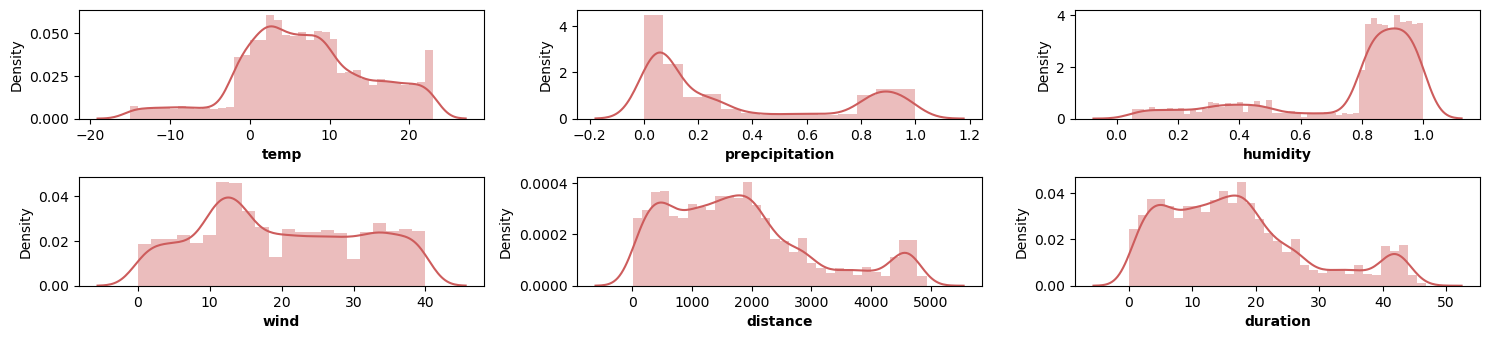

In [44]:
numeric_features = train_df.iloc[:,5:-1]

plt.figure(figsize=(15, 100))

for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=train_df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [45]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [46]:
train_df.iloc[:,5:-1] = robustscaler.fit_transform(train_df.iloc[:,5:-1])
train_df

,quantity-purchased,weight_transformed,dispatched_days,connection_days,description,temp,prepcipitation,humidity,wind,distance,duration,days-taken
0,1,3,2,3,8,-1.5,0.945946,0.411765,-0.210526,0.405811,0.434478,2
1,1,2,4,3,9,0.9,-0.121622,-4.000000,1.000000,1.943487,1.992292,3
2,1,2,2,3,5,0.7,1.108108,0.588235,0.578947,0.507344,0.548704,2
3,1,2,3,3,10,1.2,-0.148649,0.000000,-0.105263,-0.291507,-0.290820,1
4,1,1,2,4,4,0.4,-0.013514,0.411765,-0.421053,-0.442209,-0.414856,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,3,2,4,2,0.0,0.864865,0.352941,-0.842105,0.606960,0.621584,2
7996,1,1,2,3,0,0.1,-0.202703,-2.647059,-0.052632,-0.714879,-0.716188,0
7997,1,3,3,5,9,0.6,-0.094595,-4.529412,-0.157895,0.204023,0.212334,2
7998,1,1,3,3,5,0.3,0.918919,-0.058824,0.000000,0.518838,0.525578,1


In [ ]:
#robustscaler.scale_

In [ ]:
#robustscaler.center_

In [47]:
test_df.iloc[:,5:-1] = robustscaler.transform(test_df.iloc[:,5:-1])
test_df

,quantity-purchased,weight_transformed,dispatched_days,connection_days,description,temp,prepcipitation,humidity,wind,distance,duration,days-taken
0,1,1,3,3,5,-0.6,0.945946,-0.058824,0.263158,0.393040,0.410652,2
1,1,2,2,4,9,0.3,-0.094595,-2.941176,1.052632,0.374521,0.361598,1
2,1,2,2,4,3,-0.2,0.054054,0.117647,-0.894737,1.913474,1.902593,2
3,1,1,2,4,1,-0.4,0.878378,0.705882,0.052632,-0.740421,-0.716188,0
4,1,2,2,5,9,0.3,-0.175676,-2.235294,0.052632,-0.764687,-0.761037,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,3,2,3,4,0.3,-0.013514,0.235294,-0.315789,-0.741699,-0.742116,0
1996,1,1,2,3,7,0.9,-0.162162,-4.294118,-0.631579,0.573116,0.561317,1
1997,2,1,2,4,1,-0.1,0.648649,0.647059,1.105263,-0.347063,-0.337772,1
1998,1,1,2,4,1,-0.3,0.783784,0.588235,0.578947,-0.129310,-0.146461,2


In [ ]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix

from sklearn.model_selection import cross_val_score

#from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss

In [ ]:
models = []

models.append(('LogisticReg',LogisticRegression()))
models.append(('KNeighborsClf',KNeighborsClassifier()))
models.append(('DecisionTreeClf',DecisionTreeClassifier()))
models.append(('RandomForestClf',RandomForestClassifier()))

In [ ]:
metrics = pd.DataFrame(index=['Train_Accuracy', 'Test_Accuracy','CV_Accuracy', 
                              'precision', 'recall', 'f1_Score', 'roc_auc', 'log_loss'],
                       columns=['LogisticReg','KNeighborsClf', 'DecisionTreeClf', 'RandomForestClf'])
metrics

In [ ]:
"""Accuracy = accuracy_score(true, predicted) # Calculate Accuracy
f1_Score = f1_score(true, predicted) # Calculate F1-score
precision = precision_score(true, predicted) # Calculate Precision
recall = recall_score(true, predicted)  # Calculate Recall
roc_auc = roc_auc_score(true, predicted) #Calculate Roc

"""

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    metrics.loc['Train_Accuracy', name] = round(train_accuracy*100,2)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    metrics.loc['Test_Accuracy', name] = round(test_accuracy*100,2)

    cv_result = cross_val_score(model, X_train, y_train, cv = 3, scoring ='accuracy')
    print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
    metrics.loc['CV_Accuracy', name] = round(cv_result.mean()*100,2)
    
    precision = precision_score(y_test, y_test_pred, average="weighted")
    metrics.loc['precision', name] = round(precision*100,2)

    recall = recall_score(y_test, y_test_pred, average="weighted")
    metrics.loc['recall', name] = round(recall*100,2)
    
    f1_Score = f1_score(y_test, y_test_pred, average="weighted")
    metrics.loc['f1_Score', name] = round(f1_Score*100,2)
    
  
    # Probablities based scores
    y_preb_probs = model.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class = "ovr")
    metrics.loc['roc_auc', name] = round(roc_auc*100,2)
    
    logloss = log_loss(y_test, y_preb_probs)
    metrics.loc['log_loss', name] = logloss

    

In [ ]:
metrics

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Random Forest
"""
param_grid = {'criterion' : ['gini', 'entropy'],
        'n_estimators' : [10,100,200,300],
        'max_depth' : [5,10,15,20],
        'max_features':  [5,6,7,8,9,10],
        'min_samples_leaf': [5,6,7,8,9,10],
        'oob_score' : [True,False],
        'n_jobs': [-1],
        'random_state': [42]
        }

rf_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
rf_model.fit(X_train,y_train)
rf_model.best_params_

"""

In [ ]:
rf_model = RandomForestClassifier(criterion= 'entropy', n_estimators= 10, max_depth= 5, max_features= 7, 
                                  min_samples_leaf= 7, oob_score=True, random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

In [ ]:
f1_Score = f1_score(y_test, y_test_pred, average="weighted")
f1_Score

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
y_pred_rf = pd.DataFrame(y_pred_rf)
mydf = pd.concat([y_test, y_pred_rf], axis=1)
mydf.to_excel(r'C:\Users\Ricky\Downloads\Just.xlsx', index=False)